# Notebook Setup

## Working Directory

What is the current working directory?:

In [1]:
import os
os.getcwd()

'U:\\Projects\\KFIR\\notebooks'

Add parent directory to path if necessary:

In [2]:
import sys, os, re

working_directory = os.getcwd()
if re.search('\\\\notebooks$', working_directory):
    one_directory_up = re.sub('\\\\notebooks$', '', working_directory)
    sys.path.append(one_directory_up)
    
sys.path

['',
 'U:\\Projects\\KFIR\\notebooks',
 'C:\\Program Files (x86)\\PerkinElmerInformatics\\ChemOffice2016\\ChemScript\\Lib',
 'U:\\PortableApps\\WinPython32bit-3.7.0.2\\python-3.7.0\\python37.zip',
 'U:\\PortableApps\\WinPython32bit-3.7.0.2\\python-3.7.0\\DLLs',
 'U:\\PortableApps\\WinPython32bit-3.7.0.2\\python-3.7.0\\lib',
 'U:\\PortableApps\\WinPython32bit-3.7.0.2\\python-3.7.0',
 'U:\\PortableApps\\WinPython32bit-3.7.0.2\\python-3.7.0\\lib\\site-packages',
 'U:\\PortableApps\\WinPython32bit-3.7.0.2\\python-3.7.0\\lib\\site-packages\\win32',
 'U:\\PortableApps\\WinPython32bit-3.7.0.2\\python-3.7.0\\lib\\site-packages\\win32\\lib',
 'U:\\PortableApps\\WinPython32bit-3.7.0.2\\python-3.7.0\\lib\\site-packages\\Pythonwin',
 'U:\\PortableApps\\WinPython32bit-3.7.0.2\\python-3.7.0\\lib\\site-packages\\IPython\\extensions',
 'U:\\PortableApps\\WinPython32bit-3.7.0.2\\settings\\.ipython',
 'U:\\Projects\\KFIR']

## Packages

## Core packages

In [3]:
import numpy as np
import pandas as pd

### Plotly

Check current version:

In [4]:
from plotly import __version__ as plotly_version
plotly_version

'3.2.0'

#### Online Plotly

Read plotly credentials from file:

In [5]:
from preprocessor.Text_File import Text_File

plotly_file = Text_File('..//private//plotly_credentials')
plotly_file = plotly_file.return_content()
plotly_credentials = plotly_file.splitlines()

plotly_username = plotly_credentials[0]
plotly_key = plotly_credentials[1]

Set parameters for online usage:

In [6]:
import plotly.plotly as plotly_online
iplot_online = plotly_online.iplot

import plotly.graph_objs as graph_objects
from plotly.tools import set_credentials_file

set_credentials_file(username=plotly_username, api_key=plotly_key)  # put your own plotly username and api key here 

#### Offline Plotly

Setup for offline usage:

In [31]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly import graph_objs
init_notebook_mode(connected=True)

# Graph Components

## KeywordPlus subgraph

Read and view components:

In [8]:
keywordPlus_graph_components = pd.read_csv('data//subgraph-components-vs-keywordPlusses.csv')

In [9]:
keywordPlus_graph_components.head()

,keywordPlus,setId
0,Disease,82571
1,Therapy,82571
2,Acute myocardial-infarction,82571
3,Stroke patients,82571
4,Handicap,82571


Get a histogram of values occurring in subgraph:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0ABEB810>]],
      dtype=object)

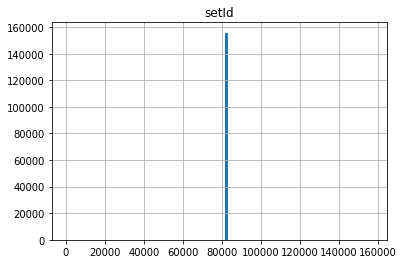

In [11]:
keywordPlus_graph_components.hist(column='setId', bins=100)

View the largest component:

(i.e., the most commonly occuring component `setId`):

In [9]:
keywordPlus_graph_components['setId'].value_counts().head(15)

82571     155796
22228         10
148375         6
139231         4
82278          4
88796          4
130759         4
130270         4
98750          4
138769         3
142362         3
15084          3
24727          3
142992         3
85149          3
Name: setId, dtype: int64

In [10]:
largest_component = keywordPlus_graph_components.loc[keywordPlus_graph_components['setId'] == 82571, :]
largest_component.head(10)

,keywordPlus,setId
0,Disease,82571
1,Therapy,82571
2,Acute myocardial-infarction,82571
3,Stroke patients,82571
4,Handicap,82571
5,Interobserver agreement,82571
6,Intracerebral hemorrhage,82571
7,Bleeding complications,82571
8,Optimal intensity,82571
9,Warfarin,82571


View other components:

In [11]:
disconnected_components = keywordPlus_graph_components.loc[keywordPlus_graph_components['setId'] != 82571, :]
disconnected_components.head(10)

,keywordPlus,setId
670,Extension problems,670
1339,Small observation noise,12011
1423,A decarboxylase deficiency,1423
1834,General dental practice,1834
2115,Triptycene,2115
3738,Mistreatment,3738
4091,Biodegradable implants,4091
4440,Oral involvement,4440
4486,Cp(x),4487
4487,Topological classification,4487


Compare the **size of the largest component and other components**:

In [12]:
number_of_nodes_in_largest_component = largest_component.count()['keywordPlus']
number_of_nodes_in_largest_component

155796

In [13]:
number_of_nodes_in_other_components = disconnected_components.count()['keywordPlus']
number_of_nodes_in_other_components

893

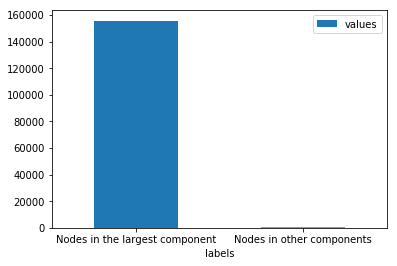

In [14]:
df = pd.DataFrame({'labels':['Nodes in the largest component', 'Nodes in other components'], 'values':[number_of_nodes_in_largest_component, number_of_nodes_in_other_components]})
ax = df.plot.bar(x='labels', y='values', rot=0)

## AuthorKeyword subgraph

Read and view components:

In [15]:
authorKeyword_graph_components = pd.read_csv('data//subgraph-components-vs-authorKeywords.csv')

In [5]:
authorKeyword_graph_components.head(25)

,authorKeyword,setId
0,photosynthesis,98756
1,ozone,98756
2,UV-B radiation,98756
3,growth,98756
4,Elymus athericus,98756
5,"pain, postoperative",28602
6,"analgesics, prescribing",28602
7,CCD,98756
8,image processing,98756
9,microscopy,98756


Get a histogram of values occurring in subgraph:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x07689C90>]],
      dtype=object)

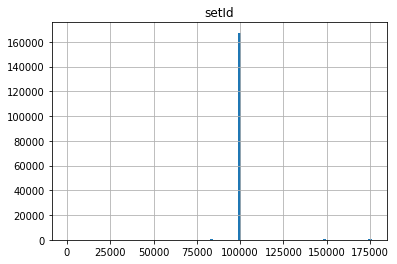

In [7]:
authorKeyword_graph_components.hist(column='setId', bins=100)

View the largest component:

(i.e., the most commonly occuring component `setId`):

In [8]:
authorKeyword_graph_components['setId'].value_counts().head(15)

98756     167354
84848         38
76205         32
174909        24
174192        20
107806        15
174932        15
174591        14
98567         14
165073        13
173848        13
97642         12
175171        12
148925        12
92691         11
Name: setId, dtype: int64

In [10]:
largest_component = authorKeyword_graph_components.loc[authorKeyword_graph_components['setId'] == 98756, :]
largest_component.head(10)

,authorKeyword,setId
0,photosynthesis,98756
1,ozone,98756
2,UV-B radiation,98756
3,growth,98756
4,Elymus athericus,98756
7,CCD,98756
8,image processing,98756
9,microscopy,98756
10,analysis,98756
11,living,98756


View other components:

In [11]:
disconnected_components = authorKeyword_graph_components.loc[authorKeyword_graph_components['setId'] != 98756, :]
disconnected_components.head(15)

,authorKeyword,setId
5,"pain, postoperative",28602
6,"analgesics, prescribing",28602
57,photon beams,14460
58,head scatter,14460
59,wedge factor,14460
60,mini-phantom,14460
61,build-up cap,14460
94,"properties, coronary dilation, in vitro and in...",98
95,CAS 140890-71-7,98
96,"VUF 8929, anti-ischaemic",98


Compare the **size of the largest component and other components**:

In [12]:
number_of_nodes_in_largest_component = largest_component.count()['authorKeyword']
number_of_nodes_in_largest_component

167353

In [13]:
number_of_nodes_in_other_components = disconnected_components.count()['authorKeyword']
number_of_nodes_in_other_components

8492

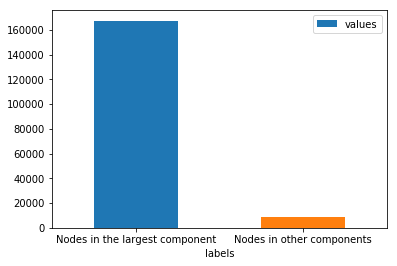

In [14]:
df = pd.DataFrame({'labels':['Nodes in the largest component', 'Nodes in other components'], 'values':[number_of_nodes_in_largest_component, number_of_nodes_in_other_components]})
ax = df.plot.bar(x='labels', y='values', rot=0)

## Annotation subgraph

Read and view components:

In [16]:
annotation_graph_components = pd.read_csv('data//subgraph-components-vs-annotations.csv')

In [17]:
annotation_graph_components.head(25)

,annotation,setId
0,blood group,50898
1,surfactants,50898
2,image processing,50898
3,lateral shift,50898
4,DNA,50898
5,microscope,50898
6,Serologic,50898
7,signal-to-noise ratio,50898
8,phenotype,50898
9,expression,50898


Get a histogram of values occurring in subgraph:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0AF9DAF0>]],
      dtype=object)

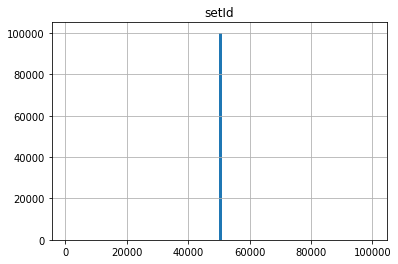

In [18]:
annotation_graph_components.hist(column='setId', bins=100)

View the largest component:

(i.e., the most commonly occuring component `setId`):

In [20]:
annotation_graph_components['setId'].value_counts().head(15)

50898    100153
98961         4
97169         4
89439         3
78431         3
24546         3
14051         3
74754         2
68992         2
84438         2
88457         2
47666         2
92495         2
22947         2
62983         2
Name: setId, dtype: int64

In [23]:
largest_component = annotation_graph_components.loc[annotation_graph_components['setId'] == 50898, :]
largest_component.head(10)

,annotation,setId
0,blood group,50898
1,surfactants,50898
2,image processing,50898
3,lateral shift,50898
4,DNA,50898
5,microscope,50898
6,Serologic,50898
7,signal-to-noise ratio,50898
8,phenotype,50898
9,expression,50898


View other components:

In [25]:
disconnected_components = annotation_graph_components.loc[annotation_graph_components['setId'] != 50898, :]
disconnected_components.head(15)

,annotation,setId
557,salutogenesis,557
755,World Anti-Doping Code,14051
876,anarchists,13982
1720,Hammersmith,1720
2869,Direct Instruction,2869
2931,cybersecurity,11631
3227,Foreground-Background,11029
3228,male contraceptive,3228
11029,scheduling discipline,11029
11367,ASSER,14051


Compare the **size of the largest component and other components**:

In [26]:
number_of_nodes_in_largest_component = largest_component.count()['annotation']
number_of_nodes_in_largest_component

100152

In [27]:
number_of_nodes_in_other_components = disconnected_components.count()['annotation']
number_of_nodes_in_other_components

267

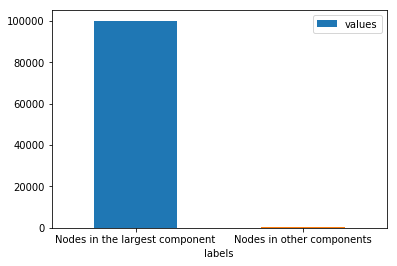

In [28]:
df = pd.DataFrame({'labels':['Nodes in the largest component', 'Nodes in other components'], 'values':[number_of_nodes_in_largest_component, number_of_nodes_in_other_components]})
ax = df.plot.bar(x='labels', y='values', rot=0)

## Subject category subgraph

Read and view components:

In [46]:
subjectCategory_graph_components = pd.read_csv('data//subgraph-components-vs-subjectCategories.csv')

In [34]:
subjectCategory_graph_components.head(10)

,subjectCategory,setId
0,"Film, Radio & Television",1
1,Neurosciences & Neurology,1
2,Asian Studies,1
3,Sport Sciences,1
4,Environmental Sciences & Ecology,1
5,Anesthesiology,1
6,Microscopy,1
7,General & Internal Medicine,1
8,Public Administration,1
9,Business & Economics,1


Get a histogram of values occurring in subgraph:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0B9AC430>]],
      dtype=object)

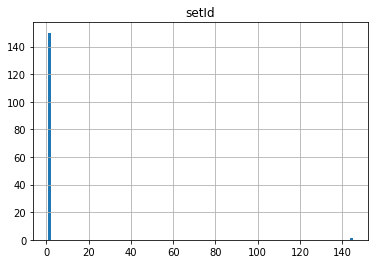

In [35]:
subjectCategory_graph_components.hist(column='setId', bins=100)

View the largest component:

(i.e., the most commonly occuring component `setId`):

In [37]:
subjectCategory_graph_components['setId'].value_counts().head(15)

1      150
145      1
Name: setId, dtype: int64

In [38]:
largest_component = subjectCategory_graph_components.loc[subjectCategory_graph_components['setId'] == 1, :]
largest_component.head(10)

,subjectCategory,setId
0,"Film, Radio & Television",1
1,Neurosciences & Neurology,1
2,Asian Studies,1
3,Sport Sciences,1
4,Environmental Sciences & Ecology,1
5,Anesthesiology,1
6,Microscopy,1
7,General & Internal Medicine,1
8,Public Administration,1
9,Business & Economics,1


View other components:

In [39]:
disconnected_components = subjectCategory_graph_components.loc[subjectCategory_graph_components['setId'] != 1, :]
disconnected_components.head(15)

,subjectCategory,setId
145,Dance,145


Compare the **size of the largest component and other components**:

In [40]:
number_of_nodes_in_largest_component = largest_component.count()['subjectCategory']
number_of_nodes_in_largest_component

150

In [41]:
number_of_nodes_in_other_components = disconnected_components.count()['subjectCategory']
number_of_nodes_in_other_components

1

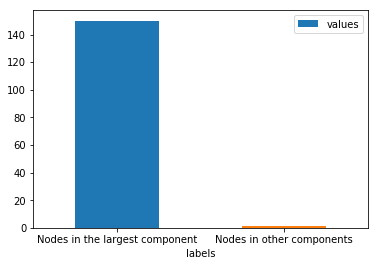

In [42]:
df = pd.DataFrame({'labels':['Nodes in the largest component', 'Nodes in other components'], 'values':[number_of_nodes_in_largest_component, number_of_nodes_in_other_components]})
ax = df.plot.bar(x='labels', y='values', rot=0)

## Web of Science category subgraph

Read and view components:

In [47]:
wosCategory_graph_components = pd.read_csv('data//subgraph-components-vs-wosCategories.csv')

In [48]:
wosCategory_graph_components.head(10)

,wosCategory,setId
0,"Film, Radio, Television",3
1,Clinical Neurology,3
2,Neurosciences,3
3,Asian Studies,3
4,Sport Sciences,3
5,Environmental Sciences,3
6,Anesthesiology,3
7,Microscopy,3
8,General & Internal Medicine,3
9,Economics,3


Get a histogram of values occurring in subgraph:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0B1E5E10>]],
      dtype=object)

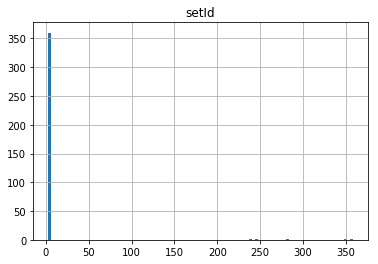

In [50]:
wosCategory_graph_components.hist(column='setId', bins=100)

View the largest component:

(i.e., the most commonly occuring component `setId`):

In [51]:
wosCategory_graph_components['setId'].value_counts().head(15)

3      360
358      1
350      1
283      1
245      1
240      1
Name: setId, dtype: int64

In [53]:
largest_component = wosCategory_graph_components.loc[wosCategory_graph_components['setId'] == 3, :]
largest_component.head(10)

,wosCategory,setId
0,"Film, Radio, Television",3
1,Clinical Neurology,3
2,Neurosciences,3
3,Asian Studies,3
4,Sport Sciences,3
5,Environmental Sciences,3
6,Anesthesiology,3
7,Microscopy,3
8,General & Internal Medicine,3
9,Economics,3


View other components:

In [54]:
disconnected_components = wosCategory_graph_components.loc[wosCategory_graph_components['setId'] != 3, :]
disconnected_components.head(15)

,wosCategory,setId
240,Ornithology,240
245,Characterization & Testing,245
283,Dance,283
350,Poetry,350
358,Paper & Wood,358


Compare the **size of the largest component and other components**:

In [55]:
number_of_nodes_in_largest_component = largest_component.count()['wosCategory']
number_of_nodes_in_largest_component

360

In [56]:
number_of_nodes_in_other_components = disconnected_components.count()['wosCategory']
number_of_nodes_in_other_components

5

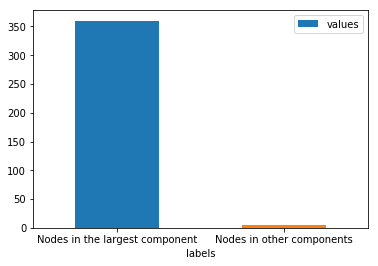

In [57]:
df = pd.DataFrame({'labels':['Nodes in the largest component', 'Nodes in other components'], 'values':[number_of_nodes_in_largest_component, number_of_nodes_in_other_components]})
ax = df.plot.bar(x='labels', y='values', rot=0)

# Betweenness Centrality

## Keyword plusses

## Author keywords

## Annotations

In [12]:
annotation_centralities = pd.read_csv('U://Projects//KFIR//notebooks//data//betweenness-centralities-vs-annotations.csv')

In [13]:
annotation_centralities.head()

,annotation,betweennessCentrality
0,Netherlands,2.170042e+08
1,expression,1.928076e+08
2,Dutch,1.786238e+08
3,gene,1.514926e+08
4,protein,1.349026e+08


In [14]:
annotation_centralities.tail()

,annotation,betweennessCentrality
100148,CAD software,0.0
100149,modern method,0.0
100150,Keck Interferometer,0.0
100151,octinoxate,0.0
100152,Mesenteric lymph nodes,0.0


In [15]:
annotation_centralities['betweennessCentrality'].describe()

count    1.001530e+05
mean     8.718492e+04
std      1.651807e+06
min      0.000000e+00
25%      0.000000e+00
50%      1.424218e+02
75%      3.281350e+03
max      2.170042e+08
Name: betweennessCentrality, dtype: float64

In [51]:
bc = annotation_centralities['betweennessCentrality']
normalized_betweenness_centralities = (bc - bc.min()) / (bc.max() - bc.min())

In [52]:
normalized_betweenness_centralities.head()

0    1.000000
1    0.888497
2    0.823135
3    0.698109
4    0.621659
Name: betweennessCentrality, dtype: float64

In [53]:
normalized_betweenness_centralities.tail()

100148    0.0
100149    0.0
100150    0.0
100151    0.0
100152    0.0
Name: betweennessCentrality, dtype: float64

In [54]:
normalized_betweenness_centralities.describe()

count    1.001530e+05
mean     4.017660e-04
std      7.611867e-03
min      0.000000e+00
25%      0.000000e+00
50%      6.563088e-07
75%      1.512113e-05
max      1.000000e+00
Name: betweennessCentrality, dtype: float64

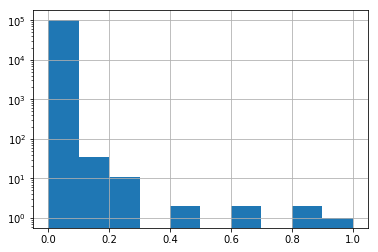

In [55]:
normalized_betweenness_centralities.hist(log=True)

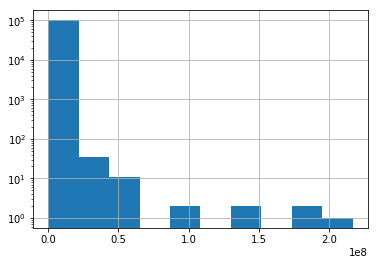

In [40]:
annotation_centralities['betweennessCentrality'].hist(log=True)

## Subject categories

## Web of Science categories